In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import warnings
# Ignore all DeprecationWarnings globally
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv("bank_marketing_dataset.csv")
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [61]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [62]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [63]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score', 'converted'],
      dtype='object')

In [64]:
for cat_col in categorical_cols:
    if df[cat_col].isnull().any():
        df[cat_col].fillna('NA', inplace = True)

In [65]:
for num_col in numerical_cols:
    if df[num_col].isnull().any():
        df[num_col].fillna(0, inplace = True)

In [66]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [67]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108,0.619015
std,1.449717,24254.347030,1.681564,0.288465,0.485795
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500,0.000000
50%,2.000000,57449.500000,3.000000,0.510000,1.000000
75%,3.000000,68241.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [70]:
len(df_full_train), len(df_test)

(1169, 293)

In [71]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [72]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [73]:
df_train = df_train.reset_index(drop = True)

In [74]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,events,manufacturing,2,95543.0,unemployed,europe,3,0.78,0
1,referral,NA,1,54924.0,student,south_america,6,0.39,1
2,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22,0
3,paid_ads,other,2,34600.0,employed,south_america,2,0.31,0
4,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01,0
...,...,...,...,...,...,...,...,...,...
871,NA,other,5,67314.0,NA,europe,2,0.87,1
872,events,education,6,63996.0,NA,australia,4,0.92,1
873,organic_search,finance,1,73702.0,unemployed,north_america,2,0.55,0
874,events,technology,1,93341.0,student,middle_east,4,0.99,0


In [75]:
from sklearn.metrics import roc_auc_score

In [76]:
# 2. Define features and target
numerical_features = ['lead_score', 'number_of_courses_viewed', 'interaction_count', 'annual_income']
target_variable = 'converted'
y_train = df_train[target_variable]

auc_results = {}

In [77]:
# 3 & 4. Calculate AUC for each numerical feature and invert if AUC < 0.5
for col in numerical_features:
    # Use the feature as the prediction score
    y_pred = df_train[col]

    # Calculate initial AUC
    initial_auc = roc_auc_score(y_train, y_pred)
    current_auc = initial_auc

    # Check for inversion
    if initial_auc < 0.5:
        # Invert the variable by negating it
        y_pred_inverted = -df_train[col]
        current_auc = roc_auc_score(y_train, y_pred_inverted)
        print(f"Feature: {col}, Initial AUC: {initial_auc:.4f} (Inverted), Final AUC: {current_auc:.4f}")
    else:
        print(f"Feature: {col}, Initial AUC: {initial_auc:.4f} (Not Inverted), Final AUC: {current_auc:.4f}")

    # Store the final AUC
    auc_results[col] = current_auc

Feature: lead_score, Initial AUC: 0.6145 (Not Inverted), Final AUC: 0.6145
Feature: number_of_courses_viewed, Initial AUC: 0.7636 (Not Inverted), Final AUC: 0.7636
Feature: interaction_count, Initial AUC: 0.7383 (Not Inverted), Final AUC: 0.7383
Feature: annual_income, Initial AUC: 0.5520 (Not Inverted), Final AUC: 0.5520


In [78]:
# 5. Find the feature with the highest AUC
highest_auc_feature = max(auc_results, key=auc_results.get)
highest_auc_value = auc_results[highest_auc_feature]

print(f"\nAUC Results: {auc_results}")
print(f"The numerical variable with the highest AUC is '{highest_auc_feature}' with an AUC of {highest_auc_value:.4f}")


AUC Results: {'lead_score': np.float64(0.6144993577250176), 'number_of_courses_viewed': np.float64(0.7635680590007088), 'interaction_count': np.float64(0.738270176293409), 'annual_income': np.float64(0.5519578313253012)}
The numerical variable with the highest AUC is 'number_of_courses_viewed' with an AUC of 0.7636


# One hot Encoding

In [79]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [80]:
from sklearn.feature_extraction import DictVectorizer

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1462 non-null   object 
 1   industry                  1462 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1462 non-null   float64
 4   employment_status         1462 non-null   object 
 5   location                  1462 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [82]:
df.isnull().sum().sum()

np.int64(0)

In [83]:
categorical_cols = ['lead_source', 'industry', 'employment_status', 'location']
numerical_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']

In [84]:
dv = DictVectorizer(sparse = False)

In [85]:
train_dicts = df_train[categorical_cols  + numerical_cols].to_dict(orient = 'records')

In [86]:
train_dicts[0]

{'lead_source': 'events',
 'industry': 'manufacturing',
 'employment_status': 'unemployed',
 'location': 'europe',
 'number_of_courses_viewed': 2,
 'annual_income': 95543.0,
 'interaction_count': 3,
 'lead_score': 0.78,
 'converted': 0}

In [87]:
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient = 'records')

In [88]:
val_dicts[0]

{'lead_source': 'organic_search',
 'industry': 'manufacturing',
 'employment_status': 'NA',
 'location': 'asia',
 'number_of_courses_viewed': 1,
 'annual_income': 0.0,
 'interaction_count': 0,
 'lead_score': 0.73,
 'converted': 1}

# Inputing into the Logistic Regression Model

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [90]:
X = df.drop("converted", axis=1)
y = df["converted"]

In [91]:
dv = DictVectorizer(sparse = False)

In [92]:
train_dicts = df_train[categorical_cols + numerical_cols].to_dict(orient = 'records')

In [93]:
train_dicts[0]

{'lead_source': 'events',
 'industry': 'manufacturing',
 'employment_status': 'unemployed',
 'location': 'europe',
 'number_of_courses_viewed': 2,
 'annual_income': 95543.0,
 'interaction_count': 3,
 'lead_score': 0.78,
 'converted': 0}

In [94]:
X_train = dv.fit_transform(train_dicts)

In [95]:
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient = 'records')

In [96]:
val_dicts[0]

{'lead_source': 'organic_search',
 'industry': 'manufacturing',
 'employment_status': 'NA',
 'location': 'asia',
 'number_of_courses_viewed': 1,
 'annual_income': 0.0,
 'interaction_count': 0,
 'lead_score': 0.73,
 'converted': 1}

In [97]:
X_val = dv.fit_transform(val_dicts)

In [98]:
# Model definition
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [99]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [100]:
# Assuming X_train is a Pandas DataFrame

# 1. Apply One-Hot Encoding to convert all string/categorical columns into numerical
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

model.fit(X_val,y_val)

LogisticRegression(max_iter=1000, solver='liblinear')

In [101]:
# Predict and evaluate
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {round(accuracy, 3)}")

Validation Accuracy: 0.749


In [102]:
from sklearn.metrics import accuracy_score

In [103]:
accuracy_score(y_val, y_pred >= 0.5)

0.7486338797814208

In [104]:
thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score)) 
    scores.append(score)

0.00 0.642
0.01 0.749
0.02 0.749
0.03 0.749
0.04 0.749
0.05 0.749
0.06 0.749
0.07 0.749
0.08 0.749
0.09 0.749
0.10 0.749
0.11 0.749
0.12 0.749
0.13 0.749
0.14 0.749
0.15 0.749
0.16 0.749
0.17 0.749
0.18 0.749
0.19 0.749
0.20 0.749
0.21 0.749
0.22 0.749
0.23 0.749
0.24 0.749
0.25 0.749
0.26 0.749
0.27 0.749
0.28 0.749
0.29 0.749
0.30 0.749
0.31 0.749
0.32 0.749
0.33 0.749
0.34 0.749
0.35 0.749
0.36 0.749
0.37 0.749
0.38 0.749
0.39 0.749
0.40 0.749
0.41 0.749
0.42 0.749
0.43 0.749
0.44 0.749
0.45 0.749
0.46 0.749
0.47 0.749
0.48 0.749
0.49 0.749
0.50 0.749
0.51 0.749
0.52 0.749
0.53 0.749
0.54 0.749
0.55 0.749
0.56 0.749
0.57 0.749
0.58 0.749
0.59 0.749
0.60 0.749
0.61 0.749
0.62 0.749
0.63 0.749
0.64 0.749
0.65 0.749
0.66 0.749
0.67 0.749
0.68 0.749
0.69 0.749
0.70 0.749
0.71 0.749
0.72 0.749
0.73 0.749
0.74 0.749
0.75 0.749
0.76 0.749
0.77 0.749
0.78 0.749
0.79 0.749
0.80 0.749
0.81 0.749
0.82 0.749
0.83 0.749
0.84 0.749
0.85 0.749
0.86 0.749
0.87 0.749
0.88 0.749
0.89 0.749
0.90 0.749

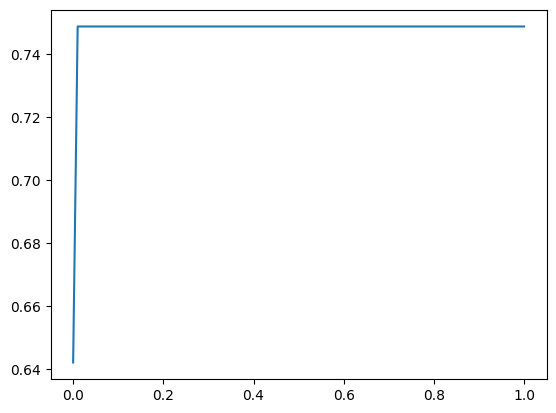

In [105]:
plt.plot(thresholds, scores)

# Confusion Table

In [106]:
from collections import Counter

In [107]:
Counter(y_pred >= 1.0)

Counter({np.True_: 305, np.False_: 61})

In [108]:
1 - y_val.mean()

np.float64(0.3579234972677595)

In [109]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [110]:
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [111]:
predict_positive[ :5]

array([ True, False,  True, False,  True])

In [112]:
actual_positive [:5]

719    False
683    False
503     True
424     True
846     True
Name: converted, dtype: bool

In [113]:
predict_positive & actual_positive

719    False
683    False
503     True
424    False
846     True
       ...  
823    False
35      True
587    False
790     True
742    False
Name: converted, Length: 366, dtype: bool

In [114]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [115]:
tp, tn

(np.int64(224), np.int64(50))

In [116]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [117]:
fp, fn

(np.int64(81), np.int64(11))

In [118]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[ 50,  81],
       [ 11, 224]])

In [119]:
(confusion_matrix/ confusion_matrix.sum()).round(2)

array([[0.14, 0.22],
       [0.03, 0.61]])

In [120]:
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Accuracy

np.float64(0.7486338797814208)

In [121]:
precision = tp / (tp + fp)
precision

np.float64(0.7344262295081967)

In [122]:
tp

np.int64(224)

In [123]:
tp + fp

np.int64(305)

In [124]:
recall = tp / (tp + fn)
recall

np.float64(0.9531914893617022)

In [125]:
tnr_calc = tn / (tn + fp)
tnr_calc

np.float64(0.3816793893129771)

In [126]:
tpr = tp / (tp + fn)
tpr

np.float64(0.9531914893617022)

In [127]:
fpr = fp / (fp + tn)
fpr

np.float64(0.6183206106870229)

In [128]:
thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    scores.append({'threshold': t, 'precision': precision, 'recall': recall})
    

In [129]:
df_scores = pd.DataFrame(scores)
df_scores

,threshold,precision,recall
0,0.00,0.642077,1.000000
1,0.01,0.734426,0.953191
2,0.02,0.734426,0.953191
3,0.03,0.734426,0.953191
4,0.04,0.734426,0.953191
...,...,...,...
96,0.96,0.734426,0.953191
97,0.97,0.734426,0.953191
98,0.98,0.734426,0.953191
99,0.99,0.734426,0.953191


<Axes: xlabel='threshold'>

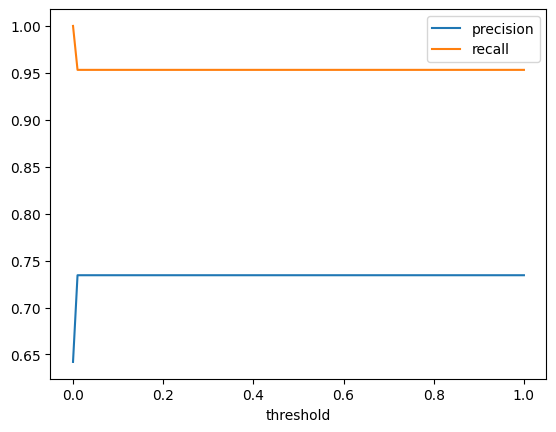

In [131]:
df_scores.plot(x='threshold', y=['precision', 'recall'])

In [ ]:
# 4. Find the intersection point
df_scores['diff'] = np.abs(df_scores['precision'] - df_scores['recall'])
intersection_threshold = df_scores.iloc[df_scores['diff'].idxmin()]['threshold']

print(f"Calculated Intersection Threshold: {intersection_threshold:.3f}")

# Cross Validation

In [ ]:
def train (df_train, y_train):
    dicts = df[categorical_cols + numerical_cols].to_dict(orient = 'records')

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return dv, model

In [ ]:
dv, model = train(df_train, y_train)